In [4]:
from sklearn.model_selection import train_test_split,GridSearchCV
import matplotlib.pyplot as plt
from keras.models import Sequential
from keras.layers import Dense,Conv2D,MaxPooling2D,Flatten,Dropout,BatchNormalization
from keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.utils import img_to_array,load_img
from warnings import filterwarnings
filterwarnings("ignore")
import os
import cv2
import glob
import pandas as pd
import numpy as np
import seaborn as sns

In [8]:
train_path ="archive/tomato/train"
val_path ="archive/tomato/val"

In [7]:
img=load_img("archive/tomato/train/Tomato___Bacterial_spot/00416648-be6e-4bd4-bc8d-82f43f8a7240___GCREC_Bact.Sp 3110.JPG")
img =img_to_array(img)
img.shape

(256, 256, 3)

In [9]:
className =glob.glob(train_path +"/*")

numberOfClass=len(className)

numberOfClass
    

10

In [10]:
model =Sequential()
model.add(Conv2D(32,(3,3),input_shape=img.shape,activation="relu"))
model.add(MaxPooling2D())
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D())
model.add(Conv2D(filters=16,kernel_size=(3,3),activation="relu",padding="same"))
model.add(MaxPooling2D())
model.add(Dropout(0.2))
model.add(Flatten())
model.add(Dense(units=1024,activation="relu"))
model.add(Dropout(0.2))
model.add(Dense(units=numberOfClass,activation="softmax"))


In [11]:
model.compile(loss="categorical_crossentropy",optimizer=("Adam"),metrics=["accuracy"])
batch_size =34

In [12]:
train_datagen =ImageDataGenerator(rescale=1./255,
                                 zoom_range=0.4)

val_datagen =ImageDataGenerator(rescale=1./255)

train_generator=train_datagen.flow_from_directory(
train_path,
target_size=img.shape[:2],
batch_size=batch_size,
color_mode="rgb",
class_mode ="categorical")


val_generator=val_datagen.flow_from_directory(
train_path,
target_size=img.shape[:2],
batch_size=batch_size,
color_mode="rgb",
class_mode ="categorical")

Found 10000 images belonging to 10 classes.
Found 10000 images belonging to 10 classes.


In [13]:
hist =model.fit_generator(generator=train_generator,
                    steps_per_epoch =2000//batch_size,
                    epochs=50,
                    validation_data=val_generator,
                    validation_steps =600//batch_size
                    
                   )

Epoch 1/50
58/58 [==============================] - 107s 2s/step - loss: 2.1859 - accuracy: 0.2013 - val_loss: 1.8544 - val_accuracy: 0.3443
Epoch 2/50
58/58 [==============================] - 100s 2s/step - loss: 1.7216 - accuracy: 0.3996 - val_loss: 1.4546 - val_accuracy: 0.5121
Epoch 3/50
58/58 [==============================] - 88s 2s/step - loss: 1.4210 - accuracy: 0.4970 - val_loss: 1.5192 - val_accuracy: 0.5017
Epoch 4/50
58/58 [==============================] - 85s 1s/step - loss: 1.1701 - accuracy: 0.5958 - val_loss: 1.2133 - val_accuracy: 0.6176
Epoch 5/50
58/58 [==============================] - 85s 1s/step - loss: 0.9481 - accuracy: 0.6815 - val_loss: 1.2136 - val_accuracy: 0.6194
Epoch 6/50
58/58 [==============================] - 79s 1s/step - loss: 0.9260 - accuracy: 0.6704 - val_loss: 1.0430 - val_accuracy: 0.6557
Epoch 7/50
58/58 [==============================] - 77s 1s/step - loss: 0.8417 - accuracy: 0.7059 - val_loss: 1.0327 - val_accuracy: 0.6522
Epoch 8/50
58/58 [

In [14]:
model.save_weights("exapmle.h5")


In [15]:
hist.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

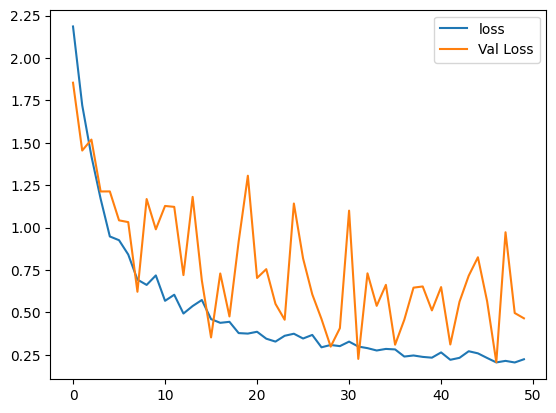

In [16]:
plt.plot(hist.history["loss"],label="loss")
plt.plot(hist.history["val_loss"],label="Val Loss")
plt.legend()
plt.show()

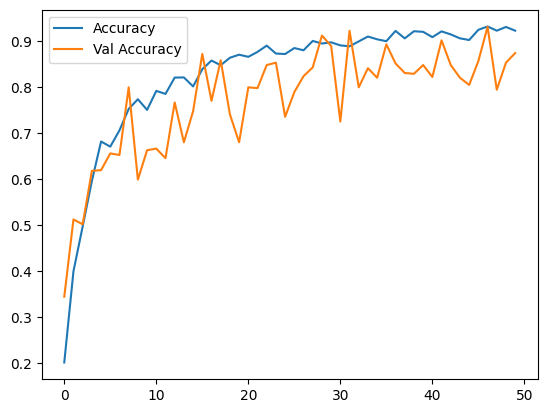

In [17]:
plt.plot(hist.history["accuracy"],label="Accuracy")
plt.plot(hist.history["val_accuracy"],label="Val Accuracy")
plt.legend()
plt.show()